<a href="https://colab.research.google.com/github/M-Awwab-Khan/collaborative-filtering-based-book-recommender-application/blob/master/collaborative_filtering_book_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative Filtering Based Book Recommender

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Datasets

In [2]:
books = pd.read_csv('drive/MyDrive/datasets/Books.csv')
ratings = pd.read_csv('drive/MyDrive/datasets/Ratings.csv')
users = pd.read_csv('drive/MyDrive/datasets/Users.csv')

<ipython-input-2-2edf9f075f8f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('drive/MyDrive/datasets/Books.csv')


## Exploratory Data Analysis

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


### Data Cleaning

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Before changing the type of Year-Of-Publication column, we have 2 text values in it. So excluding them from our dataset.

In [8]:
books = books[~((books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard'))]

In [9]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

<ipython-input-9-0e96a2232bb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271356 non-null  object
 3   Year-Of-Publication  271357 non-null  int64 
 4   Publisher            271355 non-null  object
 5   Image-URL-S          271357 non-null  object
 6   Image-URL-M          271357 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


In [11]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

There are some null values in our dataset. Below we fill in that information

In [12]:
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [13]:
books.loc[128890, 'Publisher'] = 'Mundania Pr'
books.loc[129037, 'Publisher'] = 'Bantam'
books.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [16]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [18]:
users['Age'] = users['Age'].astype('Int64')

As you can see almost all of the values in age column are empty. Fortunately, we wont be using this column for model building.

In [19]:
books.duplicated().sum()

0

In [20]:
ratings.duplicated().sum()

0

In [21]:
users.duplicated().sum()

0

Hurray! No duplicate values.

### Univariate Analysis

Now let' analyze our data, so we get the idea of how the data is distributed in our datasets. Let's see how many unique publishing years our books dataset contains.

In [22]:
# Setting theme and font size
sns.set_theme(palette='tab10',font_scale=0.7)

<Axes: >

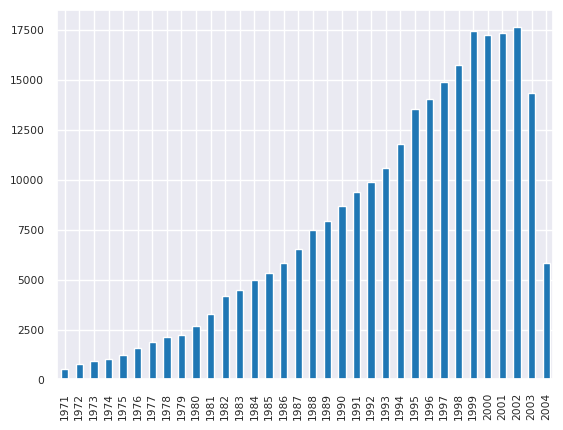

In [23]:
books[(books['Year-Of-Publication'] > 1970) & (books['Year-Of-Publication'] < 2005)]['Year-Of-Publication'].value_counts().sort_index().plot(kind='bar')

It seems like most of the books in our dataset are published between 1970 and 2004.

<Axes: title={'center': 'Top 10 Most Frequent Publishers'}, xlabel='Publisher', ylabel='Books Published'>

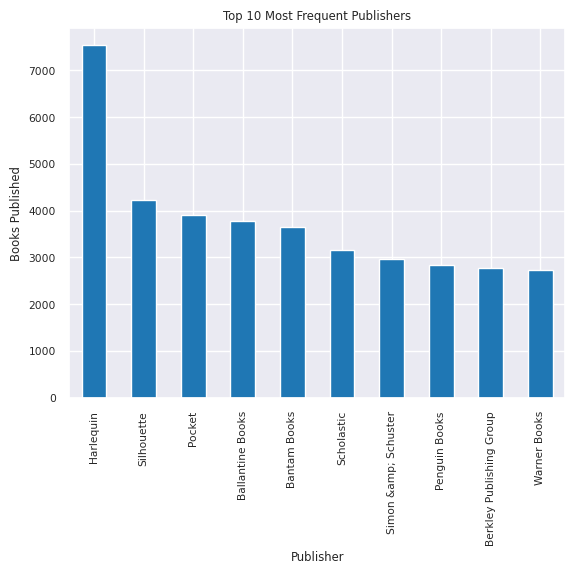

In [24]:
books['Publisher'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Frequent Publishers', xlabel='Publisher', ylabel='Books Published')

<Axes: title={'center': 'Top 10 Most Frequent Authors'}, xlabel='Author', ylabel='Books Written'>

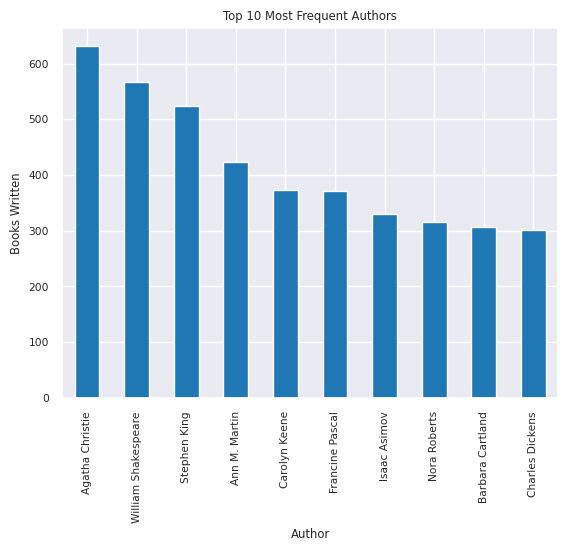

In [25]:
books['Book-Author'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Frequent Authors', xlabel='Author', ylabel='Books Written')

It can be seen that Agatha Christie, William Shakespeare and Stephen King are the most famous authors in our dataset.

Its time to analyze our ratings dataset. So first of all, let's check its ratings distribution across the entire dataset.

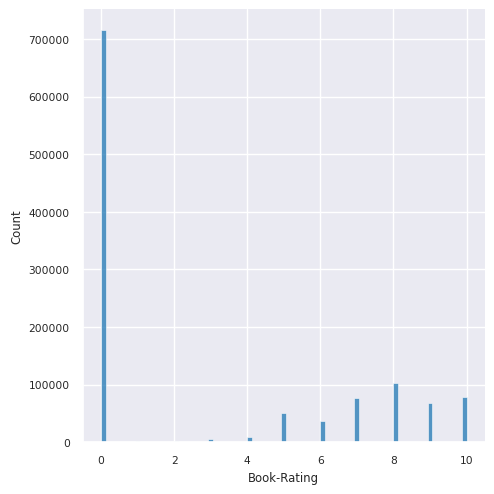

In [26]:
sns.displot(data=ratings, x='Book-Rating')

It can be seen that around 700000 books are rated 0. Additionally very few books are rated between 5 and 10.

In [27]:
ratings['User-ID'].value_counts().head(10)

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: User-ID, dtype: int64

These are the top 10 users with most ratings in our dataset.

Now let's see how our users dataset is distributed by first looking at its age column.

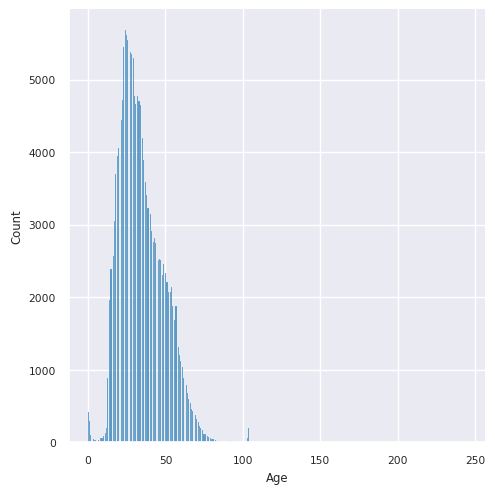

In [28]:
sns.displot(data=users, x='Age')

Our data contains most of people of ages between 10 and 60, however, there are some extraordinarily high values of age as well.

### Bivariate Analysis

Let's first of all merge books and ratings datasets on 'ISBN' column and explore it to extract useful insights.

In [29]:
books_with_ratings = books.merge(ratings, on='ISBN')
books_with_ratings.shape

(1031132, 10)

In [30]:
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


<Axes: xlabel='Book-Title'>

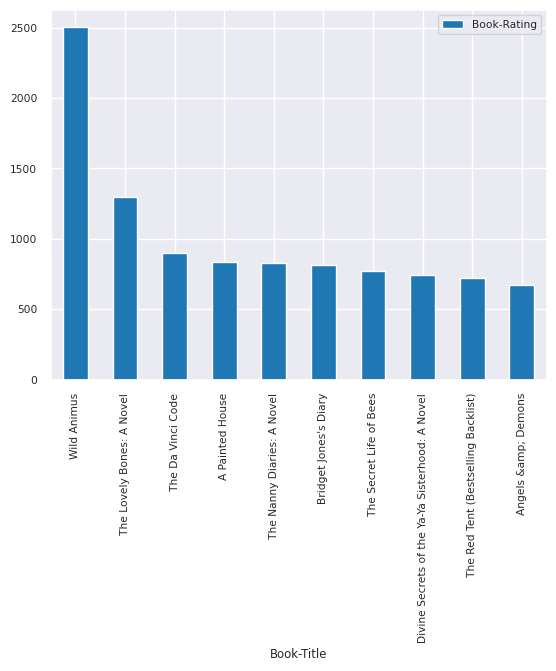

In [31]:
books_with_ratings.groupby('Book-Title')['Book-Rating']\
.count()\
.sort_values(ascending=False)\
.reset_index().head(10)\
.plot(x='Book-Title', y='Book-Rating', kind='bar')

These are the books, which have got the most ratings in our dataset.

<Axes: xlabel='Book-Author'>

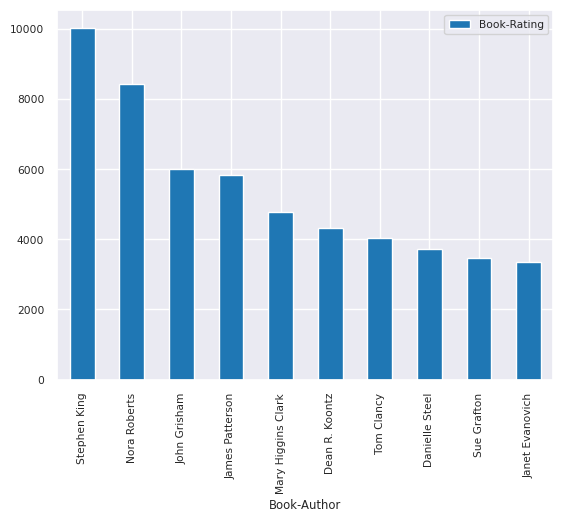

In [32]:
books_with_ratings.groupby('Book-Author')['Book-Rating']\
.count()\
.sort_values(ascending=False)\
.reset_index().head(10)\
.plot(x='Book-Author', y='Book-Rating', kind='bar')

Stephen King is the most rated author with around 10000 rating.

Now Let's see the average ratings of these authors. For this, we need to only consider those authors which have got atleast 350 ratings. Because if we dont consider this filter, some unknown authors may come up who have got 10 avg rating but only 2 ratings.

<Axes: xlabel='Book-Author', ylabel='Average Ratings'>

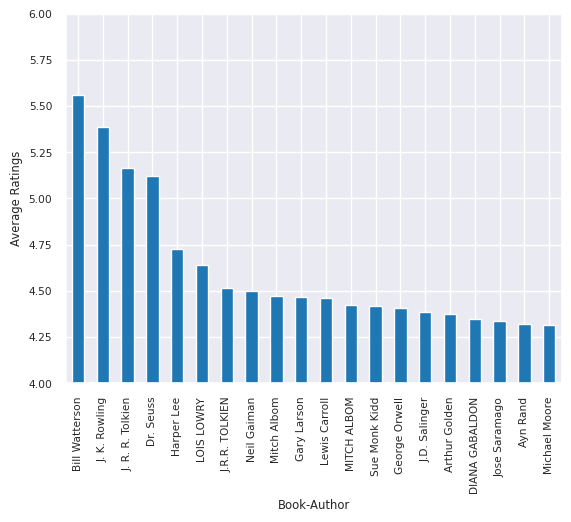

In [33]:
authors_gt_300_raters = books_with_ratings[(books_with_ratings['Book-Author'].value_counts().reindex(books_with_ratings['Book-Author'])>300).values]
authors_gt_300_raters.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False).head(20).plot(kind='bar', ylabel='Average Ratings', ylim=(4, 6))

Now let's do the same thing to find top rated books by considering only those books which have got atleast 200 votes.

<Axes: xlabel='Book-Title', ylabel='Average Ratings'>

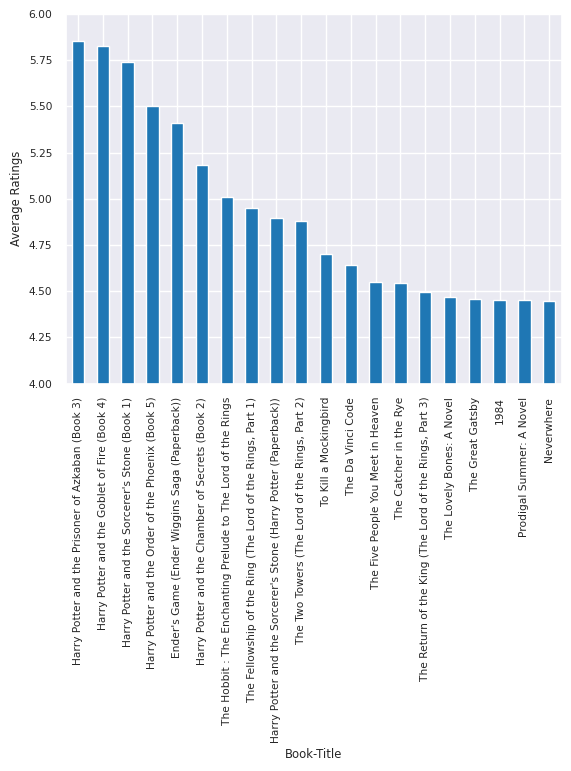

In [34]:
books_gt_200_raters = books_with_ratings[(books_with_ratings['Book-Title'].value_counts().reindex(books_with_ratings['Book-Title'])>200).values]
books_gt_200_raters.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(20).plot(kind='bar', ylabel='Average Ratings', ylim=(4, 6))

## Popularity Based Recommendation System

An alternative approach to the same problem is given below.

In [35]:
num_ratings = books_with_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index().rename(columns={'Book-Rating': 'num_ratings'})
num_ratings.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [36]:
avg_ratings = books_with_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index().rename(columns={'Book-Rating': 'avg_ratings'})
avg_ratings.head()

<ipython-input-36-39184aff30bd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_ratings = books_with_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index().rename(columns={'Book-Rating': 'avg_ratings'})


,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [37]:
popular_df = num_ratings.merge(avg_ratings, on='Book-Title')
popular_df = popular_df[popular_df['num_ratings'] > 200].sort_values('avg_ratings', ascending=False)
popular_df.shape

(293, 3)

Now, I need to get the top 50 most rated books of all time with their Author, Publisher, Year and Image, to show in my application. To do this i would write

In [38]:
popular_df = popular_df.head(50).merge(books, on='Book-Title')

In [39]:
popular_df = popular_df.drop_duplicates('Book-Title')[['Book-Title', 'ISBN', 'Book-Author', 'Publisher', 'Year-Of-Publication', 'num_ratings', 'avg_ratings', 'Image-URL-M']]

In [62]:
popular_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 204
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Book-Title           50 non-null     object 
 1   ISBN                 50 non-null     object 
 2   Book-Author          50 non-null     object 
 3   Publisher            50 non-null     object 
 4   Year-Of-Publication  50 non-null     int64  
 5   num_ratings          50 non-null     int64  
 6   avg_ratings          50 non-null     float64
 7   Image-URL-M          50 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.5+ KB


## Collaborative Filtering Based Recommender System

Now, that we have formed our dataframe of popular books. Now let's work on collaborative filtering based recommender engine.

In [41]:
x = books_with_ratings.groupby('User-ID').count()['Book-Title'] >= 200
experienced_users = x[x].index

In [42]:
filtered_ratings = books_with_ratings[books_with_ratings['User-ID'].isin(experienced_users)]

In [43]:
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [44]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]
final_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028410,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028596,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028598,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028811,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [45]:
books_to_insert = popular_df[~popular_df['Book-Title'].isin(final_ratings['Book-Title'].index)]
books_to_insert = books_to_insert.merge(books_with_ratings[['ISBN', 'Image-URL-S', 'Image-URL-L', 'Book-Rating', 'User-ID']], on='ISBN').drop(columns=['num_ratings', 'avg_ratings'])

In [46]:
final_ratings = final_ratings.append(books_to_insert)

<ipython-input-46-59f0f2005887>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_ratings = final_ratings.append(books_to_insert)


In [47]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt = pt.fillna(0)

In [48]:
pt

User-ID,26,75,91,99,226,242,243,244,254,280,...,278162,278350,278356,278418,278541,278550,278633,278645,278843,278846
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here is how our pivot table looks like. Now let's calculate the euclidean distances between each of the following books with one another. For this purpose, we need to import cosine_similarity from sklearn.metrics.pairwise

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space. Cosine similarity is the cosine of the angle between the vectors; that is, it is the dot product of the vectors divided by the product of their lengths.

In [50]:
similarity_score = cosine_similarity(pt)

In [51]:
similarity_score.shape

(709, 709)

The last thing to do is to define a function named recommend which takes in a parameter book name and returns 5 books which are closest to it.

In [52]:
def recommend(book_name):
  index = np.where(pt.index == book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]
  for item in similar_items:
    print(pt.index[item[0]])

Here, I first extracted the index of that book passed to this function, secondly, from similarity_score matrix, I extracted that row, sorted it in descending order and extracted the first 5 results which are the indices of the closest books. Lastly by looping on those 5 results I printed their corresponding books.

Now let's test it on a few different books and see how good our model performs.

In [53]:
recommend('1984')

Animal Farm
The Handmaid's Tale
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
Naked


In [54]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [55]:
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
Nights in Rodanthe


In [56]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel


In [57]:
recommend('The Hobbit : The Enchanting Prelude to The Lord of the Rings')

The Two Towers (The Lord of the Rings, Part 2)
The Return of the King (The Lord of the Rings, Part 3)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Where the Red Fern Grows
One for the Money (A Stephanie Plum Novel)


In [58]:
recommend('The Fellowship of the Ring (The Lord of the Rings, Part 1)')

The Two Towers (The Lord of the Rings, Part 2)
The Return of the King (The Lord of the Rings, Part 3)
The Hobbit : The Enchanting Prelude to The Lord of the Rings
Harry Potter and the Prisoner of Azkaban (Book 3)
The Tale of the Body Thief (Vampire Chronicles (Paperback))


In [59]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)


Now let's export our popular dataframe so that we could use it in our main application.

In [ ]:
import pickle

In [ ]:
pickle.dump(popular_df, open('popular.pkl', 'wb'))

In [ ]:
pickle.dump(books, open('books.pkl', 'wb'))

In [ ]:
pickle.dump(pt, open('pt.pkl', 'wb'))

In [ ]:
pickle.dump(similarity_score, open('similarity_score.pkl', 'wb'))

In [61]:
for index, row in popular_df.iterrows():
  print(row['Book-Title'])

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Ender's Game (Ender Wiggins Saga (Paperback))
Harry Potter and the Chamber of Secrets (Book 2)
The Hobbit : The Enchanting Prelude to The Lord of the Rings
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
The Two Towers (The Lord of the Rings, Part 2)
To Kill a Mockingbird
The Da Vinci Code
The Five People You Meet in Heaven
The Catcher in the Rye
The Return of the King (The Lord of the Rings, Part 3)
The Lovely Bones: A Novel
The Great Gatsby
1984
Prodigal Summer: A Novel
Neverwhere
The Secret Life of Bees
Stupid White Men ...and Other Sorry Excuses for the State of the Nation!
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson
The Red Tent (Bestselling Backlist)
Brave New World
The Hitchhiker's Gui